In [3]:
# Import necessary libraries and set visualization formatting
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set a consistent random state for the notebook
RANDOM = 42
np.random.seed(RANDOM)

In [6]:
# Get Data
# Source: Hands-On Machine Learning with Scikit-Learn and TensorFlow, Chapter 2
data_path = '/Users/heatherkusmierz/GitHub/handson-ml/datasets/housing/'
filename = 'housing.csv'

csv_path = os.path.join(data_path, filename)
data = pd.read_csv(csv_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
# Split the data into a training and test set

# Random split method
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=RANDOM)

# Stratified split method
# Prep data for a stratified split (add new column to split on)
data['income_cat'] = np.ceil(data['median_income'] / 1.5)
# Label those above 5 as 5
data['income_cat'].where(data['income_cat'] < 5, 5.0, inplace=True)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM)

for train_index, test_index in split.split(data, data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Drop the column that was used to stratify the data
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [21]:
# Visualize data - use training set ONLY (including labels)
data = strat_train_set.copy()

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


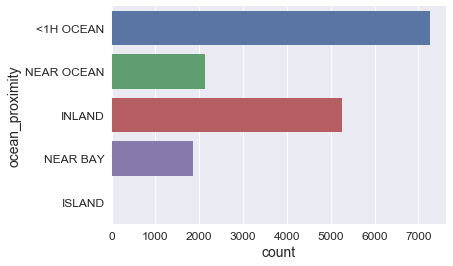

In [22]:
# Categorical features
for col in data.dtypes[data.dtypes == 'object'].index:
    sns.countplot(data=data, y=col)
    plt.show()

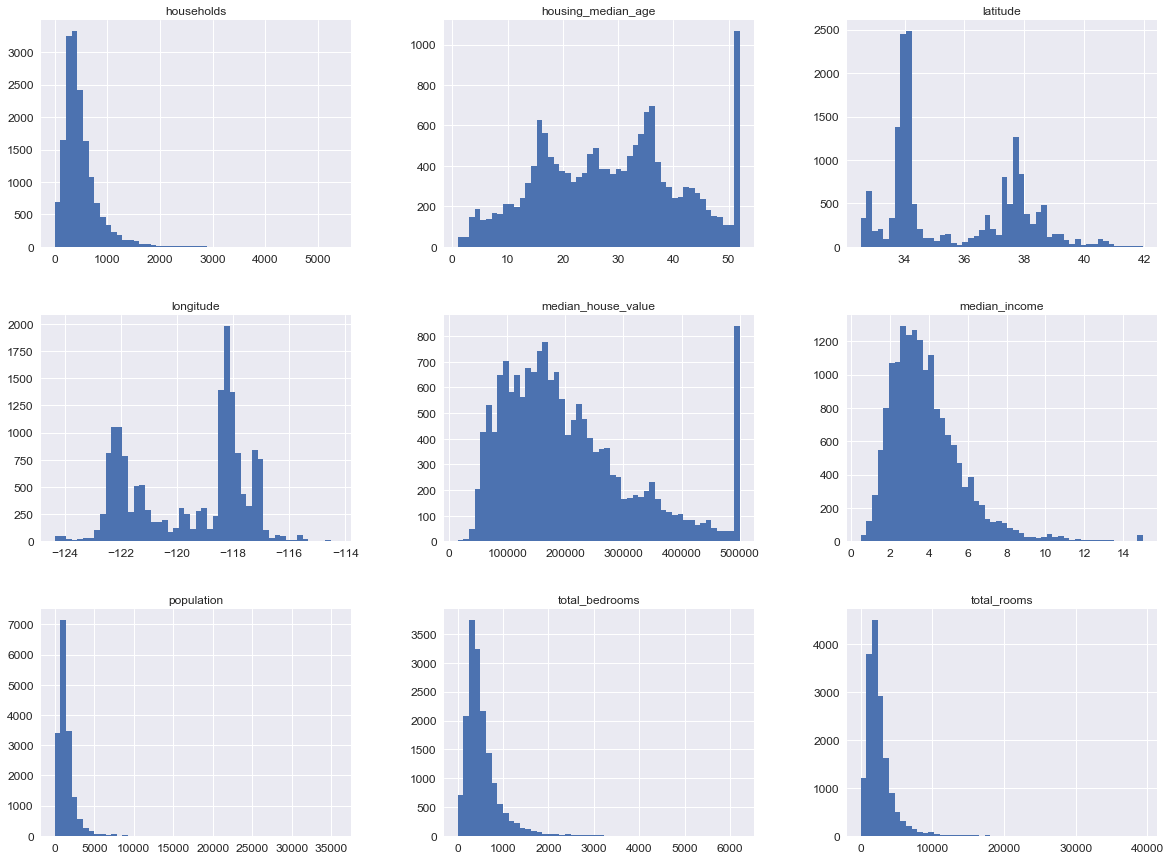

In [25]:
# Numerical features
# Histograms
data.hist(bins=50, figsize=(20, 15))
plt.show()

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


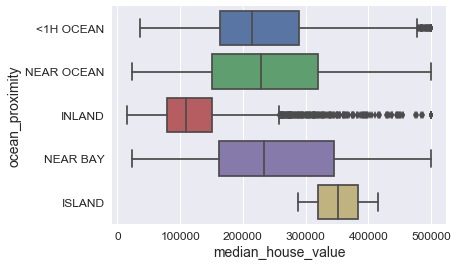

In [27]:
# Boxplots to check distribution of label and outliers
sns.boxplot(data=data, x='median_house_value', y='ocean_proximity')
plt.show()

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


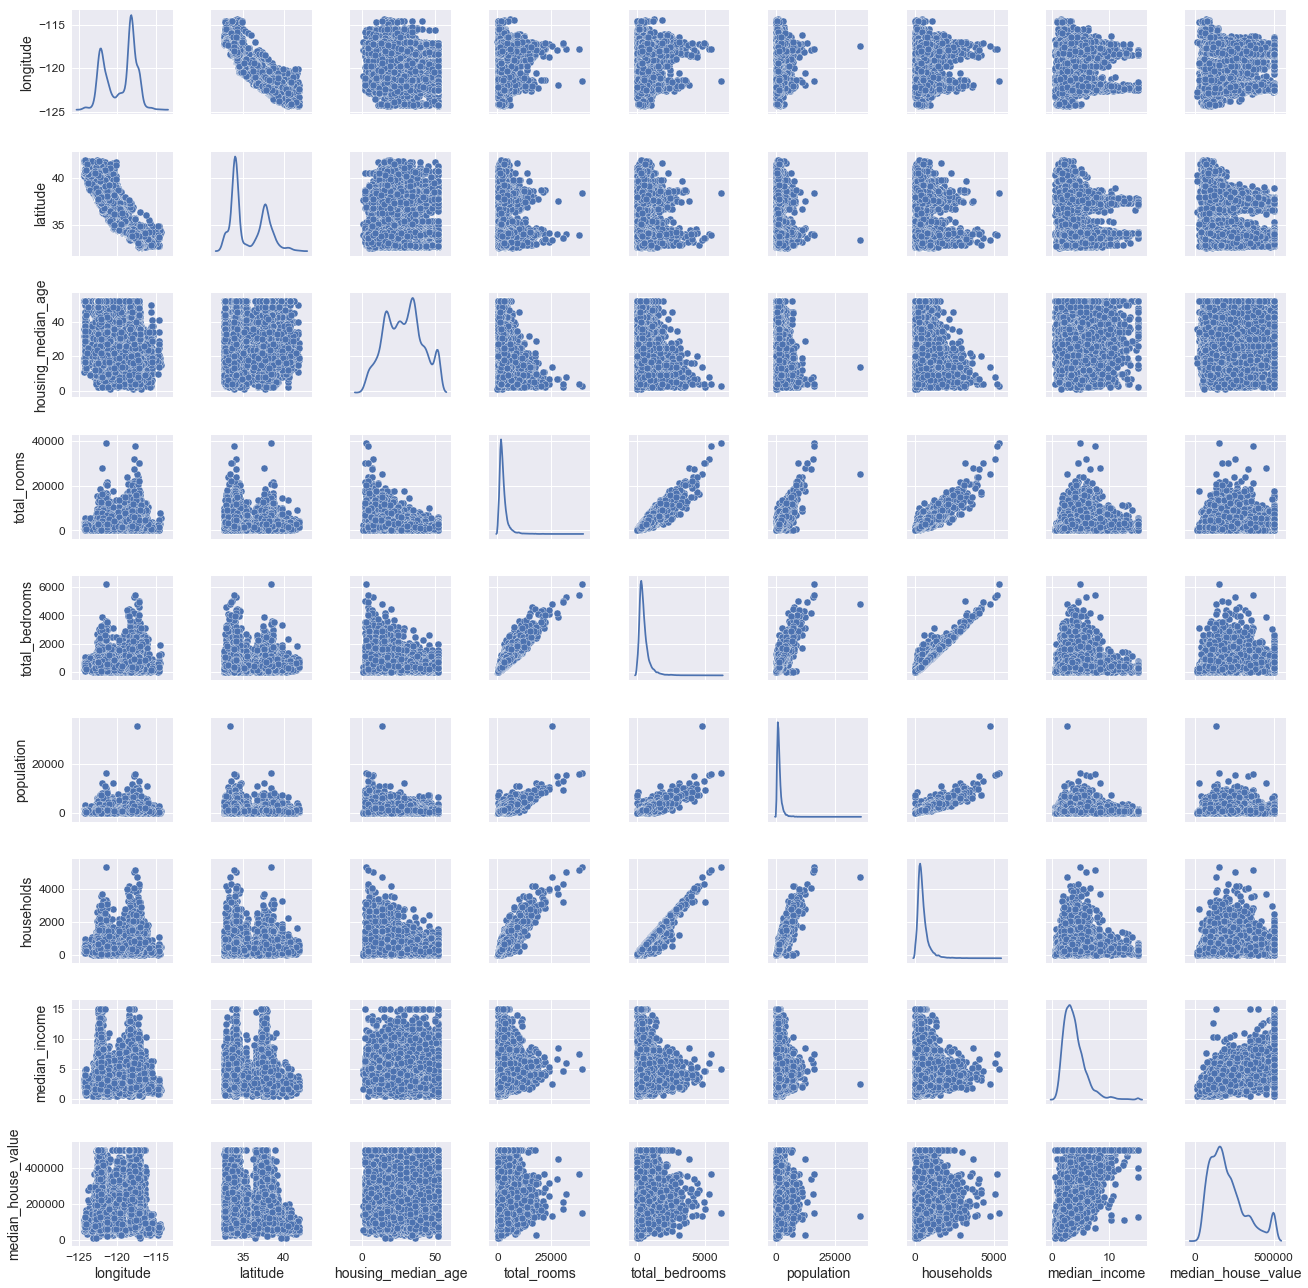

In [37]:
# Scatter Matrix
cols = list(data.select_dtypes(include=[np.number]).columns)
sns.pairplot(data[cols], palette='Set2', diag_kind='kde',
             size=2)
plt.show()

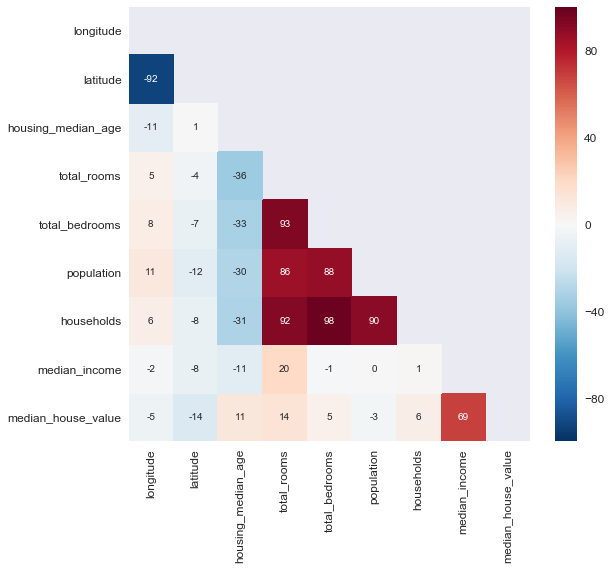

In [47]:
# Correlation Heatmap
plt.figure(figsize=(9, 8))
correlations = data.corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=True)
plt.show()

In [50]:
# Move labels from training set to own df
data = strat_train_set.drop('median_house_value', axis=1)
data_labels = strat_train_set['median_house_value'].copy()

In [53]:
# Save the numeric feature stats to fill or scale
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Remove text attributes, median can only be calculated on numeric columns
data_num = data.select_dtypes(include=[np.number])

imputer.fit(data_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [75]:
# How to fill missing values with the median
#   For illustrative purposes - this is done in a pipeline later
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns=data_num.columns)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [77]:
# Custom transformer to add attributes
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [79]:
# Create a processing pipeline to handle numeric adjustments
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()), ])


In [82]:
# Combine the numeric processing pipeline with categorical one
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs), ])

data_prepared = full_pipeline.fit_transform(data)
print(data_prepared)

[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]


In [85]:
# Select and train several models

# Pick metrics to compare
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [87]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

lin_housing_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression Root Mean Squared Error: {}'.format(lin_rmse))

lin_mae = mean_absolute_error(data_labels, lin_housing_predictions)
print('Linear Regression Mean Absolute Error: {}'.format(lin_mae))

Linear Regression Root Mean Squared Error: 68628.19819848923
Linear Regression Mean Absolute Error: 49439.89599001897


In [88]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=RANDOM)
tree_reg.fit(data_prepared, data_labels)

tree_housing_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, tree_housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print('Decision Tree Rgrsr Root Mean Squared Error: {}'.format(tree_rmse))

tree_mae = mean_absolute_error(data_labels, tree_housing_predictions)
print('Decision Tree Rgrsr Mean Absolute Error: {}'.format(tree_mae))

Decision Tree Rgrsr Root Mean Squared Error: 0.0
Decision Tree Rgrsr Mean Absolute Error: 0.0


In [89]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=RANDOM)
forest_reg.fit(data_prepared, data_labels)

forest_housing_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, forest_housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest Rgrsr Root Mean Squared Error: {}'.format(forest_rmse))

forest_mae = mean_absolute_error(data_labels, forest_housing_predictions)
print('Random Forest Rgrsr Mean Absolute Error: {}'.format(forest_mae))

/Applications/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Rgrsr Root Mean Squared Error: 21933.31414779769
Random Forest Rgrsr Mean Absolute Error: 13520.692369186045


In [90]:
# Support Vector Machine Regressor
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_prepared, data_labels)

svm_housing_predictions = svm_reg.predict(data_prepared)
svm_mse = mean_squared_error(data_labels, svm_housing_predictions)
svm_rmse = np.sqrt(svm_mse)
print('Support Vector Rgrsr Root Mean Squared Error: {}'.format(svm_rmse))

svm_mae = mean_absolute_error(data_labels, svm_housing_predictions)
print('Support Vector Rgrsr Mean Absolute Error: {}'.format(svm_mae))

Support Vector Rgrsr Root Mean Squared Error: 111094.6308539982
Support Vector Rgrsr Mean Absolute Error: 81841.46999231384


In [91]:
# Cross Validation
# Display function
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [95]:
from sklearn.model_selection import cross_val_score

# CV features expect utility (vs. cost) function, so scoring is opposite
#   of the mean squared error. `cv` argument is number of folds

lin_scores = cross_val_score(lin_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


In [94]:
tree_scores = cross_val_score(tree_reg, data_prepared, data_labels,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [97]:
forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


In [99]:
svm_scores = cross_val_score(svm_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
Mean: 111809.84009600841
Standard deviation: 2762.393664321567


In [101]:
# Tune model's hyperparameters
from sklearn.model_selection import GridSearchCV

# Parameters are a dictionary / list of dictionaries where key is
#   hyperparameter and value is a list of values to test
#   See the parameters you can tune: forest_reg.get_params()
forest_reg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [103]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=RANDOM)

# Train across 5 folds: total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [109]:
# Show the resulting score for each parameter combination
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [114]:
# Get the best-performing parameters directly
print(grid_search.best_params_)

{'max_features': 8, 'n_estimators': 30}


In [113]:
best_model_grid = grid_search.best_estimator_

In [115]:
# Randomized search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Can use other distributions for search space (reciprocal or exponent)
# The reciprocal distribution is useful when you have no idea what the scale
# of the hyperparameter should be, whereas the exponential distribution is
# best when you know (more or less) what the scale of the hyperparameter
# should be.


param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

In [116]:
forest_reg = RandomForestRegressor(random_state=RANDOM)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5,
                                scoring='neg_mean_squared_error',
                                random_state=RANDOM)
rnd_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1f2318d0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1f231dd8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [117]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


In [129]:
best_model_rnd = rnd_search.best_estimator_
best_model_rnd.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 7,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 180,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [123]:
# Inspect the best model for insights, like feature importance in trees
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[7.33442355e-02 6.29090705e-02 4.11437985e-02 1.46726854e-02
 1.41064835e-02 1.48742809e-02 1.42575993e-02 3.66158981e-01
 5.64191792e-02 1.08792957e-01 5.33510773e-02 1.03114883e-02
 1.64780994e-01 6.02803867e-05 1.96041560e-03 2.85647464e-03]


In [124]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
for item in sorted(zip(feature_importances, attributes), reverse=True):
    print(item)

(0.3661589806181342, 'median_income')
(0.1647809935615905, 'INLAND')
(0.10879295677551573, 'pop_per_hhold')
(0.07334423551601242, 'longitude')
(0.0629090704826203, 'latitude')
(0.05641917918195401, 'rooms_per_hhold')
(0.05335107734767581, 'bedrooms_per_room')
(0.041143798478729635, 'housing_median_age')
(0.014874280890402767, 'population')
(0.014672685420543237, 'total_rooms')
(0.014257599323407807, 'households')
(0.014106483453584102, 'total_bedrooms')
(0.010311488326303787, '<1H OCEAN')
(0.002856474637320158, 'NEAR OCEAN')
(0.00196041559947807, 'NEAR BAY')
(6.028038672736599e-05, 'ISLAND')


In [126]:
# Same for randomized search model
rnd_feature_importances = rnd_search.best_estimator_.feature_importances_
print(rnd_feature_importances)

[7.24699052e-02 6.38080322e-02 4.27504395e-02 1.65343807e-02
 1.56100762e-02 1.60929106e-02 1.52149598e-02 3.45178404e-01
 5.74445360e-02 1.08468449e-01 7.05907498e-02 8.77441303e-03
 1.60563229e-01 6.10403994e-05 3.08961266e-03 3.34886200e-03]


In [127]:
for item in sorted(zip(rnd_feature_importances, attributes), reverse=True):
    print(item)

(0.34517840438011976, 'median_income')
(0.16056322891587674, 'INLAND')
(0.10846844860879656, 'pop_per_hhold')
(0.0724699051555905, 'longitude')
(0.07059074984842854, 'bedrooms_per_room')
(0.06380803224443843, 'latitude')
(0.05744453597184108, 'rooms_per_hhold')
(0.042750439456624885, 'housing_median_age')
(0.016534380739553062, 'total_rooms')
(0.0160929105971958, 'population')
(0.015610076150868495, 'total_bedrooms')
(0.015214959838627945, 'households')
(0.008774413032023278, '<1H OCEAN')
(0.003348861998751044, 'NEAR OCEAN')
(0.0030896126618977574, 'NEAR BAY')
(6.104039936629336e-05, 'ISLAND')


In [134]:
# Evaluate the final model on the test set
final_model = best_model_rnd  # slightly better than grid search

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print('Final Model Root Mean Squared Error: {}'.format(final_rmse))

final_mae = mean_absolute_error(y_test, final_predictions)
print('Mean Absolute Error: {}'.format(final_mae))

Final Model Root Mean Squared Error: 46910.92117024934
Mean Absolute Error: 31300.58144514427


In [131]:
# Create a full pipeline with prep and model
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("rndforest", RandomForestRegressor(
        random_state=RANDOM,
        max_features=7,
        n_estimators=180))
])

full_pipeline_with_predictor.fit(data, data_labels)

Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbos...mators=180, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False))])

In [138]:
# Check that full pipeline is same as final model above

full_pipe_predictions = full_pipeline_with_predictor.predict(X_test)
full_mse = mean_squared_error(y_test, full_pipe_predictions)
full_rmse = np.sqrt(full_mse)
print('Root Mean Squared Error: {}'.format(full_rmse))

full_mae = mean_absolute_error(y_test, full_pipe_predictions)
print('Mean Absolute Error: {}'.format(full_mae))

print(full_rmse == final_rmse)
print(full_mae == final_mae)

Root Mean Squared Error: 46910.92117024934
Mean Absolute Error: 31300.58144514427
True
True


In [139]:
# Calculate 95% confidence interval around test RMSE
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([44945.41068188, 48797.32686039])